# EE5357 Introduction to Image Processing

# Assignment-2

Images used in the assignment are from the database http://sipi.usc.edu/database/database.php?volume=misc
Matplotlib module is used in the assignment to read and display images.


In [5]:
%matplotlib inline

## Imports

In [6]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image #just for grayscale conversion of coloured image

## 1:Binary Morphology 
### (Using Cross Window)

Image used in this section: http://sipi.usc.edu/database/database.php?volume=misc&image=32#top

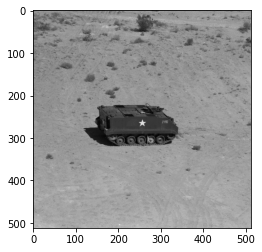

In [241]:
I4 = mpimg.imread('7.1.08.tiff')
plt.imshow(I4,cmap=plt.get_cmap('gray'))
plt.show()

In [40]:
def binarize(I,T):  
    B = np.zeros((len(I),len(I[0])))
    for i in range(len(I)):
        for j in range(len(I[0])):
            if(I[i][j]>=T):
                B[i][j]=0
            else:
                B[i][j]=1
    return B

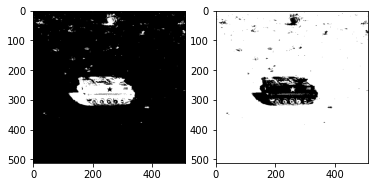

In [41]:
img4 = binarize(I4,75)
img4_not = 1-img4 #NOT operation
f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(img4,cmap=plt.get_cmap('gray'))
f.add_subplot(1,2,2)
plt.imshow(img4_not,cmap=plt.get_cmap('gray'))

In [67]:
def cross_window(n):
    c = np.zeros((n,n))
    k = int((n-1)/2)
    for i in range(0,n):
        c[k][i] = 1
    for i in range(0,n):
        c[i][k] = 1
    return c

def sub_matrix(m,a,b,p,q):
    r = np.zeros((p,q))
    for i in range(p):
        for j in range(q):
            r[i][j] = m[a-int((p-1)/2)+i][b-int((q-1)/2)+j]
    return r


## Problem 1

### Simple Dilation of original image

In [ ]:
def dilate_compare(a,b):
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(a[i][j] == b[i][j] and b[i][j]==1):
                return 1
    return 0

def dilate_cross(X,n):
    k = int((n-1)/2)
    D = np.zeros((len(X),len(X[0])))
    B = cross_window(n)
    for i in range(k,len(X)-k):
        for j in range(k,len(X[0])-k):
            r = sub_matrix(X,i,j,n,n)
            D[i][j] = dilate_compare(r,B)
    return D

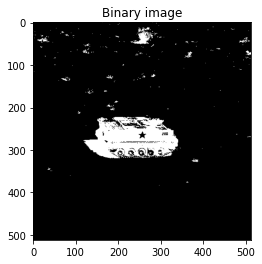

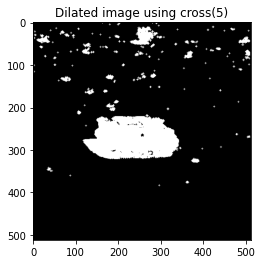

In [56]:
plt.imshow(img4,cmap=plt.get_cmap('gray'))
plt.title("Binary image")
plt.show()
dilate_img4 = dilate_cross(img4,5)
plt.imshow(dilate_img4,cmap=plt.get_cmap('gray'))
plt.title("Dilated image using cross(5)")
plt.show()

### Erosion of NOT complement

In [77]:
def erode_compare(a,b):
    same = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(a[i][j]!=b[i][j] and b[i][j]==1):
                return 0
    return 1

def erode_cross(X,n):
    k = int((n-1)/2)
    D = np.ones((len(X),len(X[0])))
    B = cross_window(n)
    for i in range(k,len(X)-k):
        for j in range(k,len(X[0])-k):
            r = sub_matrix(X,i,j,n,n)
            D[i][j] = erode_compare(r,B)
    return D

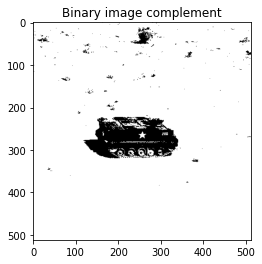

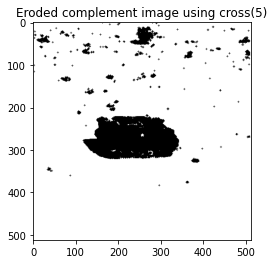

In [78]:
plt.imshow(img4_not,cmap=plt.get_cmap('gray'))
plt.title("Binary image complement")
plt.show()
erode_img4_NOT = erode_cross(img4_not,5)
plt.imshow(erode_img4_NOT,cmap=plt.get_cmap('gray'))
plt.title("Eroded complement image using cross(5)")
plt.show()

In [80]:
#Comparison
np.array_equal(dilate_img4,1-erode_img4_NOT)

True

## Problem 2

### Simple erosion of original image

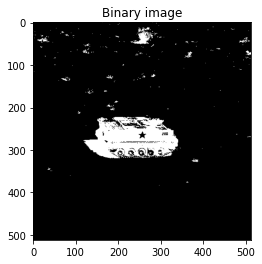

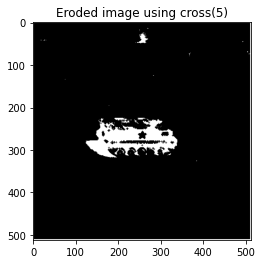

In [81]:
plt.imshow(img4,cmap=plt.get_cmap('gray'))
plt.title("Binary image")
plt.show()
erode_img4 = erode_cross(img4,5)
plt.imshow(erode_img4,cmap=plt.get_cmap('gray'))
plt.title("Eroded image using cross(5)")
plt.show()

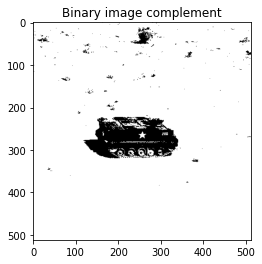

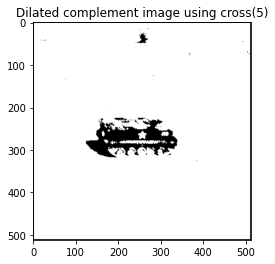

In [82]:
plt.imshow(img4_not,cmap=plt.get_cmap('gray'))
plt.title("Binary image complement")
plt.show()
dilate_img4_NOT = dilate_cross(img4_not,5)
plt.imshow(dilate_img4_NOT,cmap=plt.get_cmap('gray'))
plt.title("Dilated complement image using cross(5)")
plt.show()

In [83]:
#Comparison
np.array_equal(erode_img4,1-dilate_img4_NOT)

True

## Problem 3

### Duality of Median Operation

In [84]:
def compare(a,b):
    zeros = 0
    ones = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(a[i][j] == 1 and b[i][j] == 1):
                ones+=1
            elif(a[i][j] == 0 and b[i][j] == 1):
                zeros+=1
    if(ones>zeros):
        return 1
    return 0

In [87]:
def median_cross(X,n):
    k = int((n-1)/2)
    D = np.zeros((len(X),len(X[0])))
    B = cross_window(n)
    for i in range(k,len(X)-k):
        for j in range(k,len(X[0])-k):
            r = sub_matrix(X,i,j,n,n)
            D[i][j] = compare(r,B)
    return D

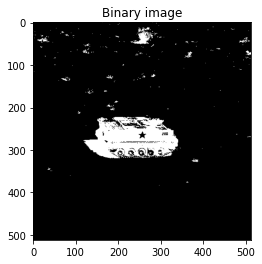

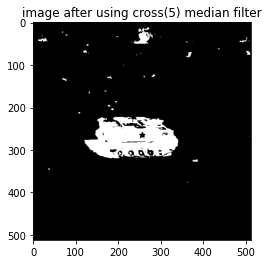

In [88]:
plt.imshow(img4,cmap=plt.get_cmap('gray'))
plt.title("Binary image")
plt.show()
median_img4 = median_cross(img4,5)
plt.imshow(median_img4,cmap=plt.get_cmap('gray'))
plt.title("image after using cross(5) median filter")
plt.show()

In [91]:
def median_cross_not(X,n):
    k = int((n-1)/2)
    D = np.ones((len(X),len(X[0])))
    B = cross_window(n)
    for i in range(k,len(X)-k):
        for j in range(k,len(X[0])-k):
            r = sub_matrix(X,i,j,n,n)
            D[i][j] = compare(r,B)
    return D

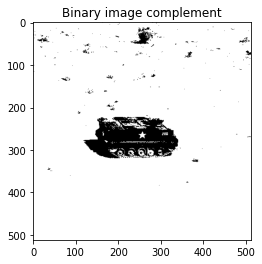

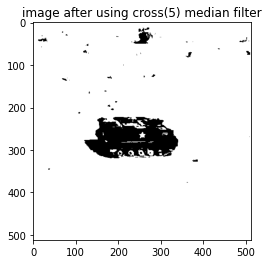

In [92]:
plt.imshow(img4_not,cmap=plt.get_cmap('gray'))
plt.title("Binary image complement")
plt.show()
median_img4_not = median_cross_not(img4_not,5)
plt.imshow(median_img4_not,cmap=plt.get_cmap('gray'))
plt.title("image after using cross(5) median filter")
plt.show()

In [93]:
#Comparison
np.array_equal(median_img4,1-median_img4_not)

True

## 2: Gray scale operations

Image used: https://apod.nasa.gov/apod/ap200324.html

Image renamed to "BH.jpg" 

Resolution: (608, 1080)
Max Intensity: 255
Resolution: 0


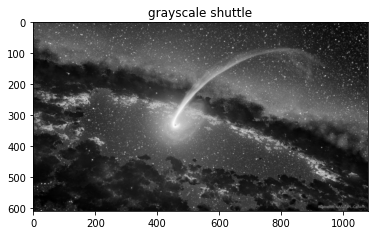

In [196]:
img = Image.open('BH.jpg').convert('L')
img.save('BHgray.jpg')
I = mpimg.imread('BHgray.jpg')
plt.title('grayscale shuttle')
plt.imshow(I,cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
res = np.shape(I)
print("Resolution:",res)
print("Max Intensity:",np.amax(I))
print("Resolution:",np.amin(I))

## Problem 1

In [197]:
def imghist(image):
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))
    plt.figure()
    plt.xlabel("grayscale value")
    plt.title("Grayscale Histogram of I")
    plt.ylabel("pixels")
    #plt.xlim([0.0, 256.0])  
    plt.stem(bin_edges[0:-1], histogram)  
    plt.hist(histogram,bin_edges)
    plt.show()

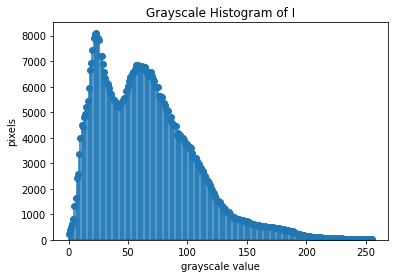

In [198]:
imghist(I)

In [199]:
P = int(input('Scaling factor P:' ))
L = int(input('Offset factor L:' ))

Scaling factor P:2
Offset factor L:0


In [200]:
Imod = P*I+L
def filteredge(image):
    res = np.shape(image)
    for i in range(res[0]):
        for j in range(res[1]):
            if image[i][j]>=255:
                image[i][j] = 255
            elif image[i][j]<=0:
                image[i][j] = 0

filteredge(Imod)
#print(I)
#print(Imod)

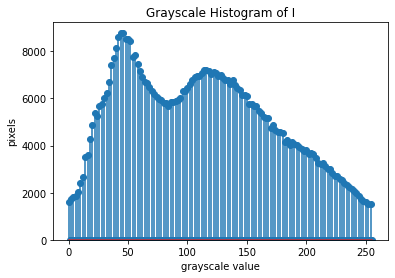

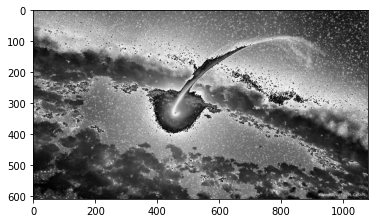

In [201]:
imghist(Imod)
plt.imshow(Imod,cmap=plt.get_cmap('gray'))

<div class="alert alert-info"><h3>CONCLUSION:-</h3><p> It is observed that the number of pixels are scaled and the width of histogram increases as the total number of pixels should be constant.

We can observe the difference in above histogram and image after applying the linear scaling operation.
</div>

Scaling factor P:1
Offset factor L:60


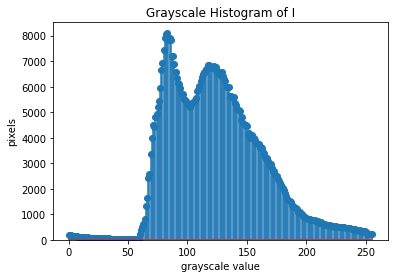

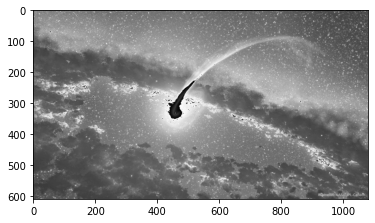

In [202]:
P = int(input('Scaling factor P:' ))
L = int(input('Offset factor L:' ))
Imod = P*I+L
filteredge(Imod)
imghist(Imod)
plt.imshow(Imod,cmap=plt.get_cmap('gray'))

<div class="alert alert-info"><h3>CONCLUSION:-</h3><p> It can be observed that the histogram is shifted to the right along x-axis. The shift is because we are adding L to every pixel intensity.If the values are greater than 255, they are taken as 255.If the values are below 0, they are considered to be 0.

</div>

## Problem 2 (FSCS)

<div class="alert alert-info"><h3>NOTE:-</h3><p> The image used in this and next problem is different than the previous since previous one had all grayscale levels between 0 and 255, but this one has a limit of maximum grayscale level of 183 as shown below...

</div>

Image used: https://apod.nasa.gov/apod/ap200915.html

Image renamed to "Venus.jpg"

Resolution: (886, 960)
Max Intensity: 183
Min Intensity: 0


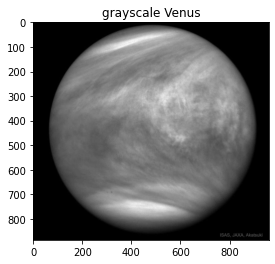

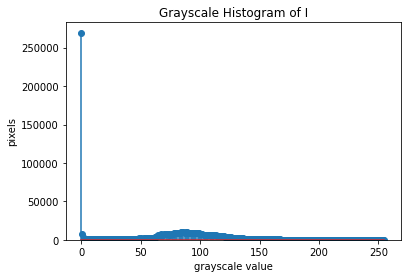

In [206]:
img = Image.open('Venus.jpg').convert('L')
img.save('Venusgray.jpg')
I2 = mpimg.imread('Venusgray.jpg')
plt.title('grayscale Venus')
plt.imshow(I2,cmap=plt.get_cmap('gray'))
res = np.shape(I2)
print("Resolution:",res)
print("Max Intensity:",np.amax(I2))
print("Min Intensity:",np.amin(I2))
imghist(I2)

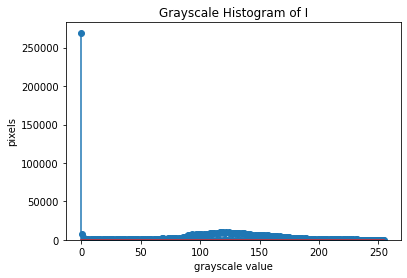

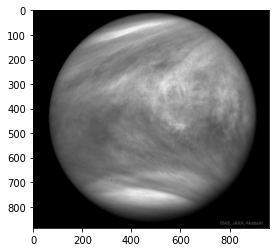

In [207]:
K = 256
A = np.amin(I2)
B = np.amax(I2)
P = (K-1)/(B-A)
L = A*(1-K)/(B-A)
I2_fullscaled = P*I2+L
filteredge(I2_fullscaled)
imghist(I2_fullscaled)
plt.imshow(I2_fullscaled,cmap=plt.get_cmap('gray'))

In [240]:
print("Max Intensity after FSCS:",np.amax(I2_fullscaled))
print("Min Intensity after FSCS:",np.amin(I2_fullscaled))

Max Intensity after FSCS: 255.0
Min Intensity after FSCS: 0.0


## Problem 3 (LOG compression)

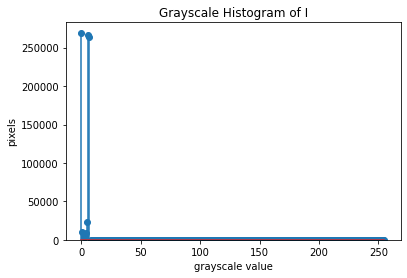

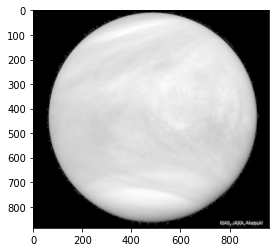

In [209]:
I2_log = np.log2(1+I2_fullscaled)
imghist(I2_log)
plt.imshow(I2_log,cmap=plt.get_cmap('gray'))

<div class="alert alert-info"><h3>CONCLUSION:-</h3><p>   
During log transformation, the dark pixels in an image are expanded as compare to the higher pixel values. The higher pixel values are kind of compressed in log transformation. As a result, after applying the bright intensities are compressed heavily causing faint details to appear.
</div>

## Problem 4 (Histogram Flattening)

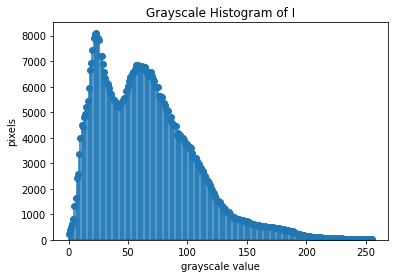

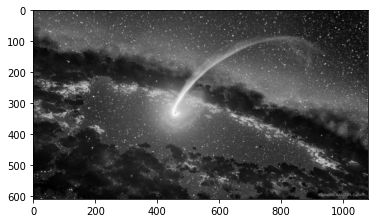

In [210]:
imghist(I)
plt.imshow(I,cmap=plt.get_cmap('gray'))

In [237]:
def normalhist(image):
    #normalised histogram
    m, n = np.shape(image)
    hist,bins = np.histogram(image, bins=256, range=(0, 256))
    return hist/(m*n)

def cdfhist(hist):
    # cumulative sum of a histogram(CDF)
    return [sum(hist[:i+1]) for i in range(len(hist))]

def histvals(image):
    #calculate Histogram
    h = normalhist(image)
    cdf = np.array(cdfhist(h)) 
    cdf_expanded = np.uint8(255*cdf) #finding transfer function values
    m, n = np.shape(image)
    new = np.zeros(image)
    # applying transfered values for each pixels
    for i in range(m):
        for j in range(n):
            new[i, j] = cdf_expanded[image[i, j]]
    H = normalhist(Y)
    #return transformed image, original and new histogram and transform function
    return new, h, H, cdf

In [238]:
new_img, h, new_h, cdf = histeq(I)


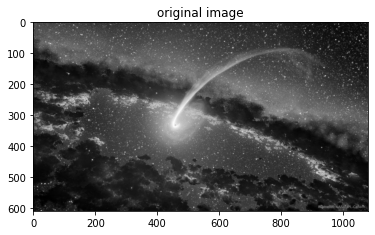

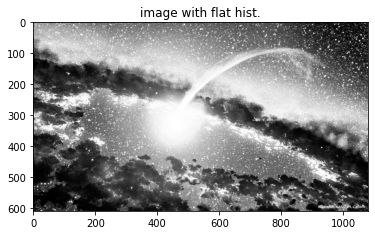

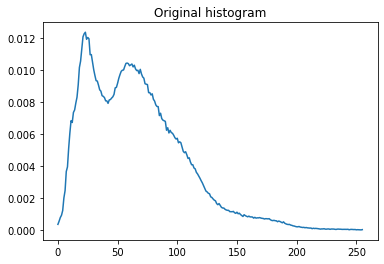

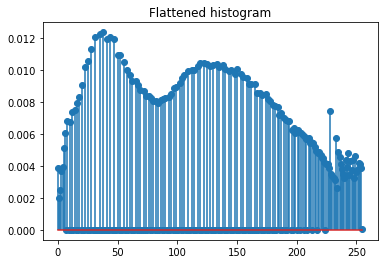

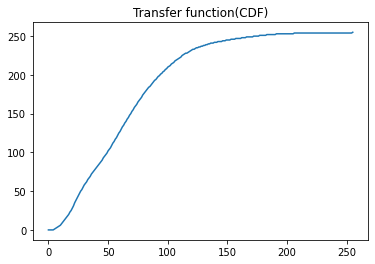

In [239]:
# show original image
plt.imshow(I,cmap=plt.get_cmap('gray'))
plt.title('original image')
plt.show()
# show new image
plt.imshow(new_img)
plt.title('image with flat hist.')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
plt.plot(h)
plt.title('Original histogram') # original histogram
plt.show()

plt.stem(new_h)
plt.title('Flattened histogram') #hist of eqlauized image
plt.show()

plt.plot(cdf)
plt.title('Transfer function(CDF)') #transfer function
plt.show()

<div class="alert alert-info"><h3>CONCLUSION:-</h3><p> The peak value of original histogram doesnt change but the values are more spread.Also, the flattened image has increased contrast.
   
We can also notice that histogram is spread over all the values and available grayscale.
</div>

****

## 3: ZOOMING

Image1: https://apod.nasa.gov/apod/ap200816.html

Image2:https://apod.nasa.gov/apod/ap200903.html

Image3:https://apod.nasa.gov/apod/ap200721.html

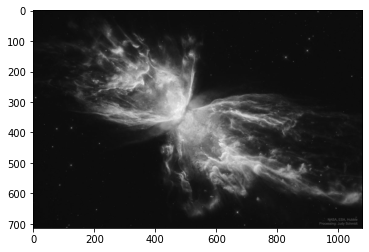

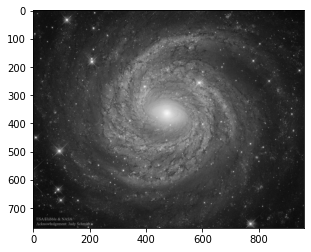

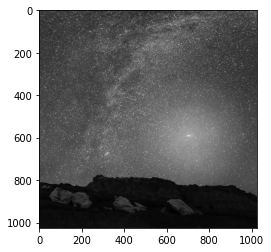

In [18]:
img1 = Image.open('Butterfly_HubbleSchmidt_1080.jpg').convert('L')
plt.imshow(img1,cmap=plt.get_cmap('gray'))
plt.show()
img2 = Image.open('NGC6814_HubbleSchmidt_960.jpg').convert('L')
plt.imshow(img2,cmap=plt.get_cmap('gray'))
plt.show()
img3 = Image.open('STScI-H-p2046b-m-1024x1025.jpg').convert('L')
plt.imshow(img3,cmap=plt.get_cmap('gray'))
plt.show()

imgs = [img1,img2,img3]

## Problem 1

In [19]:
import cv2
colored_image1 = cv2.imread('Butterfly_HubbleSchmidt_1080.jpg')
I1 = cv2.cvtColor(colored_image1, cv2.COLOR_BGR2GRAY)
colored_image2 = cv2.imread('NGC6814_HubbleSchmidt_960.jpg')
I2 = cv2.cvtColor(colored_image2, cv2.COLOR_BGR2GRAY)
colored_image3 = cv2.imread('STScI-H-p2046b-m-1024x1025.jpg')
I3 = cv2.cvtColor(colored_image3, cv2.COLOR_BGR2GRAY)
imgs = [I1,I2,I3]

### Note: Imported using opencv since pillow was resulting in errors while executing functions

In [20]:
def nearest_neighbors(img,zf):
    m,n = np.shape(img)
    mz,nz = int(m*zf), int(n*zf)
    imgz = np.zeros((mz,nz))
    for i in range(mz):
        for j in range(nz):
            x = int(round((float(i)/float(mz))*float(m)))
            y = int(round((float(j)/float(nz))*float(n)))
            X = min(x, m-1)
            Y = min(y, n-1)
            imgz[i, j] = img[X, Y]
    return imgz

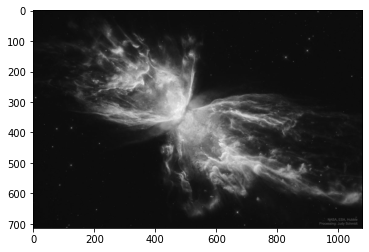

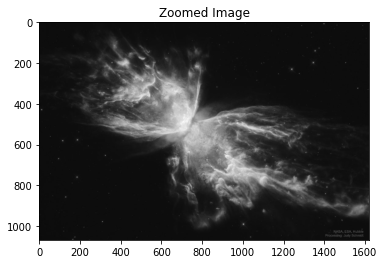

Resolution of original image:  (713, 1080)
Resolution of zoomed image:  (1069, 1620)


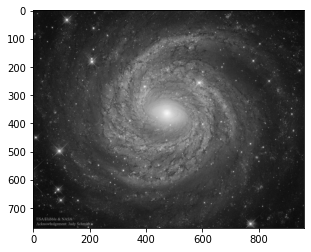

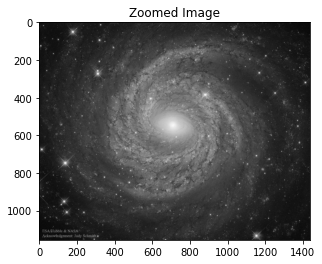

Resolution of original image:  (771, 960)
Resolution of zoomed image:  (1156, 1440)


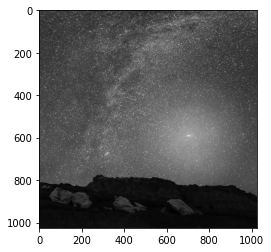

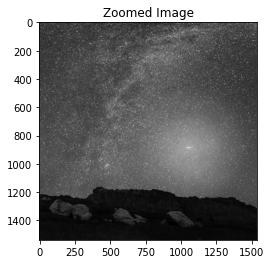

Resolution of original image:  (1025, 1024)
Resolution of zoomed image:  (1537, 1536)


In [21]:
for i in range(len(imgs)):
    zf = 1.5 #zoom factor
    imgz = nearest_neighbors(imgs[i],zf)
    plt.figure(1)
    plt.imshow(imgs[i],cmap="gray")
    plt.show()
    plt.figure(2)
    plt.title("Zoomed Image")
    plt.imshow(imgz,cmap="gray")
    plt.show()
    print("Resolution of original image: ",np.shape(imgs[i]))
    print("Resolution of zoomed image: ",np.shape(imgz))

<div class="alert alert-info"><h3>CONCLUSION:-</h3><p> It is observed that the zooming the image leads to increased resolution. This is an effect of sampling the given image. The width and height of original image is multipled by the zoom factor zf. 
</h3><p>
In the zoomed image the values that are close to the original image pixels(nearest neighbors) are taken.
</div>

## Problem 2

In [22]:
def four_neighbors(a,b,img):
    lst = []
    temp = np.ones((4,4))
    for i in range(4):
        lst.append(img[a[i]][b[i]])
    for k in range(4):
        temp[k][1] = a[k]
        temp[k][2] = b[k]
        temp[k][3] = a[k]*b[k]
    tempmat = np.matmul(np.linalg.inv(temp),lst)
    return tempmat

In [23]:
def bilinear_interpolation(img,z):
    m,n = np.shape(img)
    mz = int(m*z)
    nz = int(n*z)
    imgz = np.zeros((mz,nz))
    imgz.fill(-1)
    for i in range(m):
        for j in range(n):
            imgz[int(i*z)][int(j*z)] = img[i][j]
    for i in range(1,mz-1):
        for j in range(1,nz-1):
            if(imgz[i][j]):
                if(j%3==0 and i%3==2):
                    a = [i-1,i-1,i+1,i+1]
                    b = [j,j+1,j,j+1]
                    tempmat = four_neighbors(a,b,imgz)
                    imgz[i][j] = tempmat[0]+tempmat[1]*i+tempmat[2]*j+tempmat[3]*i*j
                elif(j%3==1 and i%3==2):
                    a = [i-1,i-1,i+1,i+1]
                    b = [j-1,j,j-1,j]
                    tempmat = four_neighbors(a,b,imgz)
                    imgz[i][j] = tempmat[0]+tempmat[1]*i+tempmat[2]*j+tempmat[3]*i*j
                elif(j%3==2 and i%3==0):
                    a = [i,i,i+1,i+1]
                    b = [j-1,j+1,j-1,j+1]
                    tempmat = four_neighbors(a,b,imgz)
                    imgz[i][j] = tempmat[0]+tempmat[1]*i+tempmat[2]*j+tempmat[3]*i*j
                elif(j%3==2 and i%3==1):
                    a = [i-1,i-1,i,i]
                    b = [j-1,j+1,j-1,j+1]
                    tempmat = four_neighbors(a,b,imgz)
                    imgz[i][j] = tempmat[0]+tempmat[1]*i+tempmat[2]*j+tempmat[3]*i*j
                elif(j%3==2 and i%3==2):
                    a = [i-1,i-1,i+1,i+1]
                    b = [j-1,j+1,j-1,j+1]
                    tempmat = four_neighbors(a,b,imgz)
                    imgz[i][j] = tempmat[0]+tempmat[1]*i+tempmat[2]*j+tempmat[3]*i*j
                
    return imgz

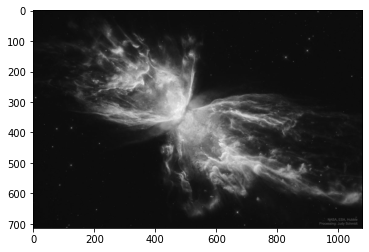

Zoomed image:-


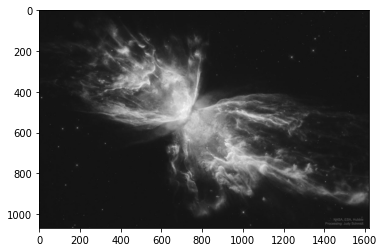

Resolution of original image:  (713, 1080)
Resolution of zoomed image:  (1069, 1620)


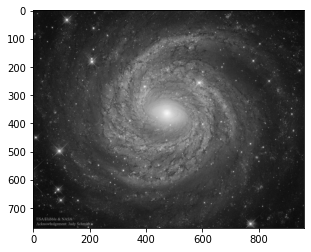

Zoomed image:-


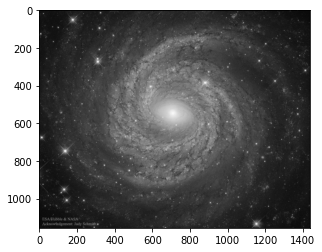

Resolution of original image:  (771, 960)
Resolution of zoomed image:  (1156, 1440)


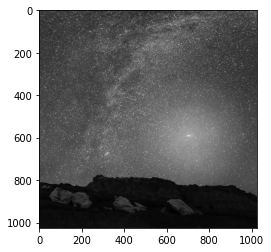

Zoomed image:-


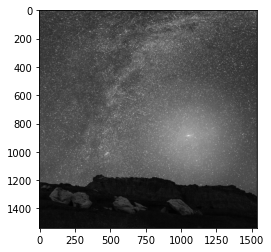

Resolution of original image:  (1025, 1024)
Resolution of zoomed image:  (1537, 1536)


In [17]:
for i in range(len(imgs)):
    zf = 1.5 #zoom factor
    imgz = bilinear_interpolation(imgs[i],zf)
    plt.figure(1)
    plt.imshow(imgs[i],cmap="gray")
    plt.show()
    plt.figure(2)
    plt.title("Zoomed Image")
    plt.imshow(imgz,cmap="gray")
    plt.show()
    print("Resolution of original image: ",np.shape(imgs[i]))
    print("Resolution of zoomed image: ",np.shape(imgz))

<div class="alert alert-info"><h3>CONCLUSION:-</h3><p> We can observe that the number of pixels are increased in zoomed image (increased resolution).The width and height of original image is multipled by a factor z and rounded to the int of that variable.
This will be symmetric all across the image. We find 4 closest neighbors for each unfilled pixel and using smoothness condition we find the value of unknown pixel.
</div>